# **Inheritance**

Inheritance is a fundamental concept in object-oriented programming that allows a class to reuse the attributes and methods of another class. 

In Python, inheritance lets you create a new class (called a *subclass*) based on an existing class (called a *parent* or *base* class). 

The subclass automatically has access to the parent’s functionality, which makes code more organized, reduces duplication, and allows you to extend or modify behavior as needed. 

In [ ]:
class Engine:
    def power(self):
        print('720 hp')

class Car(Engine):
    def weight(self):
        print('1.5 tons')

Car().power()
Car().weight()
Engine().power()

You can override variables and methods in child class

In [ ]:
class Engine:
    horse_power = 720
    cylinders_count = 8

    def cylinders(self):
        print(f'{self.cylinders_count}')

    def power(self):
        print(f'{self.horse_power} hp')

class Car(Engine):
    horse_power = 150
    def weight(self):
        print('1.5 tons')

    def power(self): # 
        print(f'Override: {self.horse_power} hp')

    def power_parent(self):
        print(f'Power parent: {super().horse_power} hp')
        super().power() # you can use keyword `super` to address parent class 

Car().power()
Car().weight()
Engine().power()
Car().power_parent()
Car().cylinders()

In [ ]:
class A:
    def add(self, a, b):
        print('A: ',  a + b)

class B(A):
    def add(self, a, b, c):
        print('B: ', a + b + c)

B().add(6, 3, 4)
super(B, B()).add(6, 3)
B().add(6, 3)

As we can see, methods are overridden by name, so if methods have different signatures, the interpreter will not notice.

## **Multiple inheritance**

the main idea of inheritance is to pass properties from the parent class to the heirs, in real life one object can have properties of several objects, so the idea of multiple inheritance seems logical, so in Python the mechanism of `multiple inheritance`§ is allowed, that is, inheritance, in which one class can have several parents:

In [ ]:
class Vehicle:
    def move(self):
        print('moving')

class Storage:
    def load_object(self):
        print('load object')
    def remove_object(self):
        print('remove object')

#On the one hand, a truck is a vehicle, on the other hand, 
#it can store cargo, so it inherits both the vehicle class and the storage class, 
#from which, for example, the Warehouse class can be inherited
class Truck(Vehicle, Storage):
    pass

class Car(Vehicle):
    pass

class Warehouse(Storage):
    pass

truck = Truck()
truck.load_object()
truck.move()
truck.remove_object()

Along with multiple inheritance comes problems with method overloading

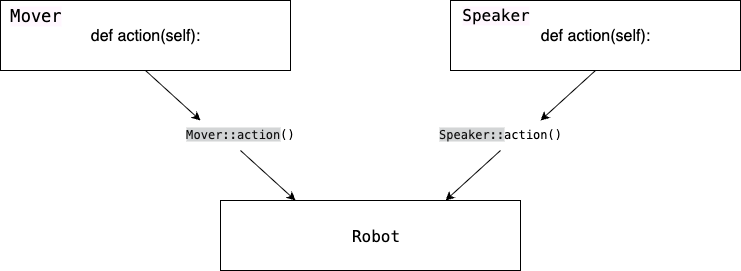

If we call `robot.action()` what method should be called?

In [ ]:
class Mover:
    def action(self):
        print("It moves")

class Speaker:
    def action(self):
        print("It says: Hi!")

class Robot(Mover, Speaker):
    pass
robot = Robot()
robot.action()

Python solves this problem. by leaving the order in which the parent classes are searched for the desired method and calls the first implementation found. This technology is called Method Resolution Order or MRO for short.

In [ ]:
Robot.mro()

Therefore, in the example, we saw that the Mover class method was called.

But having a method with the same name in multiple parent classes is not the only problem.

Suppose we have a situation where two parents are descendants of the same class, as in the illustration:

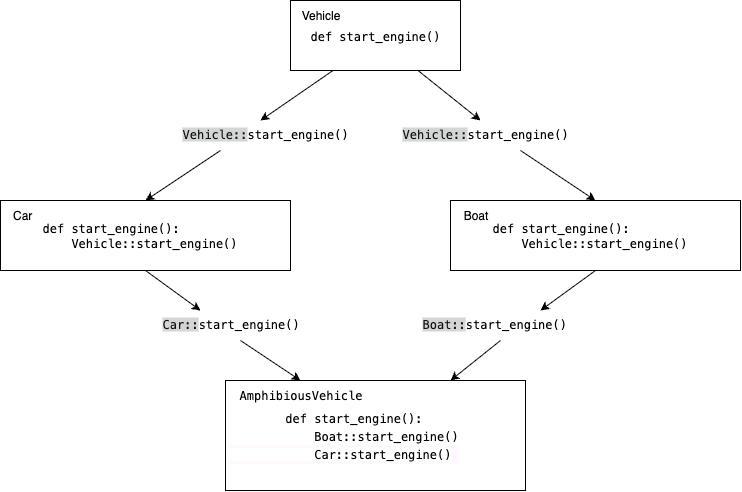

Suppose we have one engine, but since we have it in an amphibious car, we need to perform some actions related to the fact that an amphibious car is a boat, as well as individual actions related to the fact that an amphibious car is a car. 

Therefore, we need to call both the start_engine() method from Car and the start_engine() method from Boat. 
> This causes the start_engine() method from Vehicle to be called **twice**, which can lead to incorrect operation.

It is impossible to solve this problem using the method from the previous Mover-Speaker example, since **we will find one of the methods and call it, but the second one will remain uncalled**, that is, the engine start will not be handled correctly (because it needs to be started both as a car engine and as a boat engine)

To achieve the desired result in python, you do not need to try to call two parent methods explicitly. The MRO will come to the rescue here

Let's see what happens in python.

In [ ]:
class Vehicle: 
    def start_engine(self):
        print('VRRR')

class Car(Vehicle):
    def start_engine(self):
        print('Starting car engine')
        super().start_engine()

class Boat(Vehicle):
    def start_engine(self):
        print('Starting boat engine')
        super().start_engine()

class AmphibiousVehicle(Boat, Car):
    def start_engine(self):
        return super().start_engine() # we don't explicitly specify which parent's method we call

AmphibiousVehicle().start_engine()
AmphibiousVehicle.mro()

In [ ]:
Boat().start_engine()


Wow, python only called the Vehicle class method once. Why did this happen? Here is the explanation:

Python only called Vehicle once because of its Method Resolution Order (MRO). The hierarchy is `Vehicle => Boat => Car => AmphibiousVehicle`. When `AmphibiousVehicle().start_engine()` is called, `super()` moves to the next class in the MRO. First it calls `Car.start_engine()`, which calls `super()` => `Boat.start_engine()`, which calls `super()` => `Vehicle.start_engine()`. Vehicle appears only once in the MRO, so it is executed only once. Without MRO, Vehicle could be called twice through Car and Boat. 
> Super() in Python always calls the next method in the MRO, not just a parent, which avoids the diamond problem.

MRO is not a panacea, and with some inheritance structures it may not cope

In [ ]:
class Printer:
    def action(self):
        print("Printing document")

class Scanner:
    def action(self):
        print("Scanning document")

class OfficePrinter(Printer, Scanner):
    pass

class HomeScanner(Scanner, Printer):
    pass

class AllInOneDevice(OfficePrinter, HomeScanner):
    pass

AllInOneDevice().action()

When Python tries to compute the MRO for `AllInOneDevice(OfficePrinter, HomeScanner)`, it needs a single **linear** order of all classes that respects the order of each parent.

From `OfficePrinter`’s perspective, Printer must come before `Scanner`.

From `HomeScanner`’s perspective, Scanner must come before `Printer`.

These two requirements contradict each other. Python cannot satisfy both simultaneously, so it raises a `TypeError` saying the MRO is inconsistent.

In [ ]:
class HomeScanner(Printer, Scanner):
    pass

class AllInOneDevice(OfficePrinter, HomeScanner):
    pass

AllInOneDevice().action()

Swapping Printer and Scanner helps to fix the problem

<div class="alert alert-info">
    <b>Advice:</b>
    Try to make the inheritance system tree-like where possible to avoid the same problems as with diamond-type inheritance
</div>

## **Duck typing and interface expectations**

> “If it looks like a duck, swims like a duck, and quacks like a duck — it’s probably a duck.”

In Python:

* You don’t check isinstance(obj, Duck)
* You just call .quack().

In [ ]:
class Duck:
    def quack(self): print("Quack!")

class Person:
    def quack(self): print("I’m Donald!")

def make_it_quack(duck_like):
    duck_like.quack()

make_it_quack(Duck())
make_it_quack(Person())

In [ ]:
for obj in [list(), "string", (1, 2, 3)]:
    print(len(obj))
# it works, because all objects have method `__len__`

When our function expects some functionality from the provided object, it is necessary to have a method with the same name.

In [ ]:
def process_file(f):
    # Expects a file-like object supporting read() and close()
    
    print("Read data:", f.read())
    f.close()

class FakeFile:
    def read(self):
        return "fake data"
    # Missing close() method!

process_file(FakeFile())

Sometimes this type of typing can lead to unexpected errors in Runtime

## **Abstract Base Classes**

To make our code more reliable we can enforces interface expectations. For this we can use `abc` module

ABC allows you to define abstract methods that **must be implemented** by subclasses, thus, even at the stage of declaring such a class, we check that all the necessary methods are implemented, and we will not have errors at runtime (as in the previous example).

In [ ]:
from abc import ABC, abstractmethod

class Animal(ABC):
    @abstractmethod
    def speak(self):
        pass

class Dog(Animal):
    def speak(self):
        print("Woof!")

dog = Dog()
dog.speak()  # Woof!


In [ ]:
class Printable(ABC):
    @abstractmethod
    def print(self):
        pass

class WordDocument(Printable):
    def print(self):
        print('1')


def launch_printing(obj: Printable):
    obj.print()

In [ ]:
launch_printing(WordDocument())

In [ ]:
from abc import ABC, abstractmethod

class AbstractStream(ABC):
    @abstractmethod
    def read(self):
        pass
    @abstractmethod
    def close(self):
        pass

def process_file(f: AbstractStream):
    # Expects a file-like object supporting read() and close()
    
    print("Read data:", f.read())
    f.close()

class FakeFile(AbstractStream):
    def read(self):
        return "fake data"

process_file(FakeFile())


Don't forget to explicitly add `abstractmethod` decorator to all abstract methods

In [ ]:
from abc import ABC

class Base(ABC):
    def do_something(self):
        raise NotImplementedError

class Child(Base):
    pass

Child()

## **Class methods**

* A method that receives the class (cls) as the first argument instead of an instance (self).
* Defined with the `classmethod` decorator.
* Can be called on the class itself or on instances.

In [ ]:
class TxtFile:
    extension = "txt"

    @classmethod
    def get_extension(cls):
        return cls.extension

print(TxtFile.get_extension())
file = TxtFile()
print(file.get_extension())

In [ ]:
class A:
    @classmethod
    def method(cls):
        print('A: ', cls)

class B:
    def method(cls):
        print('B: ', cls)

B().method()
A.method()

`classmethod` annotation does not save from override when inheriting

# **CLI building**

> A command-line interface is a text-based user interface that allows users to interact with a computer program by typing commands as text strings.

We will make the simplest client for Telegram, which will be able to send messages

Let's add command registry, which will store commands mapping, so we needn't to add large conditional clause inside client loop.


Registry stores mapping from commands (string name) to implementation classes therefore it is assumed that there is one register for the entire program, so we can implement it, using `Singleton` pattern

> The Singleton pattern is a design pattern that restricts the instantiation of a class to exactly one object within a system, while providing a global point of access to that object.

Python does not have a default `Singleton` pattern implementation

In [ ]:
class Singleton:
    pass
class A:
    pass
class B(Singleton, A):
    pass

In [ ]:
B.mro()

In [ ]:
class Singleton:
    _instance = None

    def __new__(cls, *args, **kwargs):
        if cls._instance is not None:
            raise Exception(f"{cls.__name__} already initialized")
        instance = super().__new__(cls)
        cls._instance = instance
        return instance

    @classmethod
    def get_instance(cls):
        if cls._instance is None:
            raise Exception(f"{cls.__name__} is not initialized")
        return cls._instance

In [ ]:
from typing import Type, Any
class CommandRegistry(Singleton):
    def __init__(self):
        self._registry = {} # this is class variable (it is the same for all objects of the class)

    def add_handler(self, handler_cls: Any, command_name: str) -> None:
        # in real life we might want each command to be written to the Registry only once, 
        # but in this case, for demonstration purposes,
        # we'll comment that check and allow overwriting

        # if command_name in cls._registry:
        #     raise KeyError(f'А command with name:{command_name} has already been added to the register.')
        self._registry[command_name] = handler_cls

    def get_handlers(self)-> list[Type[Any]]:
        return list(self._registry.values())

    def get_handler(self, command_name) -> Type[Any]:
        return self._registry.get(command_name)
    
registry = CommandRegistry() # here we initialized singleton object (so we don't have to call __init__ anymore)

In [ ]:
registry is CommandRegistry.get_instance()

As we can see `get_instance` method returns the only object we created

Let's define custom Exception: we need this to distinguish between exceptions that allow us to continue our client's work and exceptions that require the client's work to be terminated immediately

In [ ]:
class ContinueClientLoopError(Exception):
    """Non fatal exception for errors in the CLI client loop."""
    def __init__(self, message):
        super().__init__(message)
        self.message = message

To make the code flexible, for each type of command in our client we will make our own handler, in which all the logic of command processing will be implemented.

First, we declare an abstract handler, in which we declare interfaces through which other parts of the code will interact with the handlers.

In [ ]:
from abc import ABC, abstractmethod
class AbstractContext:
    pass

class AbstractHandler(ABC): # when we inherit from ABC we declare class as Abstract
    def __init_subclass__(cls, **kwargs):
        super().__init_subclass__(**kwargs)
         #here the logic is added that when declaring an inherited class,
         # a mapping from a new command and a handler that processes it
         # are added to the CommandRegistry
        CommandRegistry.get_instance().add_handler(cls, cls.get_command_name())
    
    @abstractmethod # we cannot use this class to instanciate object, but we can inherit from it
    def handle(self, context: AbstractContext) -> bool: 
        #returns a variable that says whether to continue executing the program or not
        pass

    @classmethod
    @abstractmethod
    def get_command_name(cls):
        pass
    
    @classmethod
    @abstractmethod
    def get_context_type(cls):
        pass


First, we need to be able to log out of our client, so let's add a handler for the exit command.

In [ ]:
# for exit command Context is empty, but it will be usefull for other commands
class ExitCommandContext(AbstractContext):
    def __init__(self, args: str):
        if args.strip():
            raise ContinueClientLoopError('To many arguments passed')
    
class ExitCommandHandler(AbstractHandler):
    def __init__(self):
        super().__init__()
        
        
    def handle(self, context: ExitCommandContext) -> bool:
        return True

    @classmethod
    def get_command_name(cls) -> str:
        return "exit"

    @classmethod
    def get_context_type(cls) -> AbstractContext:
        return ExitCommandContext

In [ ]:
CommandRegistry.get_instance()._registry

Now let's implement a context resolver that will process the input string, find the required handler, and create a context for that handler.

In [ ]:
class ContextResolver:
    def __init__(self, handlers: list[AbstractHandler]):
        self._handlers = handlers

    def _get_handler(self, command_name: str):
        handler_type = CommandRegistry.get_instance().get_handler(command_name)
        if not handler_type:
            raise ContinueClientLoopError(f"Unknown command: {command_name}")
        handler = next(
            (obj for obj in self._handlers if isinstance(obj, handler_type))
            , None)
        if handler:
            return handler
        else:
            raise ContinueClientLoopError(f"No initialized handlers for: {command_name}")

    def resolve(self, input_line: str) -> tuple[AbstractHandler, AbstractContext]:
        parts = input_line.strip().split()
        if not parts:
            raise ContinueClientLoopError("No command provided")

        command_name = parts[0]
        args = input_line[len(command_name):]
        handler = self._get_handler(command_name)
        context_type = handler.get_context_type()
        context = context_type(args)
        return handler, context

<div class="alert alert-info">
    <b>Advice:</b>
    It is highly recommended to set up high-quality and reliable logging in your code so that if an error occurs some time after the application is launched, you can track down the cause. 
</div>


Let's make a single entry point for all logs and add the ability to configure them via config

In [ ]:
import logging
from dataclasses import dataclass
import sys


@dataclass
class LoggerConfig:
    log_file: str | None = "cli.log"
    level: str = "INFO"
    verbose: bool = True


class Logger:
    _logger = None
    verbose = False

    @classmethod
    def setup(cls, config: LoggerConfig):
        """
        config: dict with keys:
        {
            "log_file": "cli.log",
            "level": "INFO",
            "verbose": True
        }
        """
        if cls._logger is None:
            level = getattr(logging, config.level.upper(), logging.INFO)
            logger = logging.getLogger("CLI_Logger")
            logger.setLevel(level)
            formatter = logging.Formatter("%(asctime)s [%(levelname)s] %(message)s")

            if config.log_file is not None:
                file_handler = logging.FileHandler(
                    config.log_file, encoding="utf-8"
                )
                file_handler.setFormatter(formatter)
                logger.addHandler(file_handler)

            # Console handler
            console_handler = logging.StreamHandler(sys.stdout)
            console_handler.setFormatter(formatter)

            logger.addHandler(console_handler)

            cls._logger = logger
            cls.verbose = config.verbose

    @classmethod
    def log(cls, message, level=logging.INFO):
        if cls.verbose and cls._logger:
            cls._logger.log(level, message)


# **datetime module**

Python has a convenient module for working with time

In [ ]:
from datetime import time
t = time(
    hour = 4,
    minute = 40,
    second = 59
)
print(  
        t,
        t.isoformat(),
        t.strftime("%S--%M--%H"),
        t.tzname(),
        t.utcoffset(),
        t.hour,
        t.minute,
        t.second,
        t.microsecond, 
        sep='\n' 
    )


In [ ]:
from datetime import date
d = date(
    year = 2077,
    month = 12,
    day = 1)

print(  
        d, 
        d.ctime(),
        d.isocalendar(), 
        d.isoformat(), 
        d.strftime("%m--%d--%Y"), 
        d.isoweekday(),
        d.weekday(),
        d.year,
        d.month,
        d.day,
        d.toordinal(),
        sep='\n' 
    )


In [ ]:
from datetime import datetime, UTC
dt = datetime(
    year = 2077,
    month = 12,
    day = 1,
    hour = 4,
    minute = 40,
    second = 59)
dt_concat = datetime.combine(d, t)
print(dt_concat == dt)
print(  
        dt, 
        dt.isocalendar(),
        dt.utctimetuple(),
        dt.timestamp(),
        dt.timetz(),
        dt.strftime("%m--%d--%Y GG %S--%M--%H"),
        sep='\n' 
    )

dt_str = datetime.fromisoformat("2077-12-01 04:40:59")
print(dt_str, dt_str == dt)

dt_ts = datetime.fromtimestamp(3405548459)
print(dt_ts, dt_ts == dt)

dt_str_custom = datetime.strptime("12--01--2077 GG 59--40--04", "%m--%d--%Y GG %S--%M--%H")
print(dt_str_custom, dt_str_custom == dt)

print(
    datetime.now(UTC), #uses UTC time (Greenvich)
    datetime.now() # uses local pc time
    )

In [ ]:
from datetime import timedelta

td = timedelta(days=1, weeks=2, minutes=5, microseconds=3333555)
#so actually timedelta strores 3 integers:
# microseconds amount and seconds amount and days amount
print(
    td,
    td.seconds,
    td.days,
    td.total_seconds(),
    td.microseconds,
    td.resolution,
    sep='\n' 
    )

In [ ]:
td_1 = datetime.now() - datetime.fromisoformat("2026-01-01 15:25:28")
print(
    td_1, 
    type(td_1), 
    type(datetime.now()), 
    type(dt), 
    sep='\n'
    )

dt_1 = dt + td
print(dt_1, type(dt_1))

In [ ]:
print(
    td_1,
    td / td_1,
    td + td_1,
    td - td_1,
    td * 2,
    td < td_1,
    td / 2,
    abs(td_1),
    -td_1,
    sep='\n'
    )

In [ ]:
print(t + td, d + td) # you can do math with timedeltas only with datetimes

So, we can do some math with time and build complex logic using `datetime` and `timedelta`.

Let's specify in log name current datetime, this is a good way to make logs unique and make it so that you can quickly search for the log you need.

<div class="alert alert-info">
    <b>Advice:</b>
    Look carefully at the time zone in which the time is specified in your application (in logs, in the database, in objects, etc.). It is better to agree on the time zone right away. UTC (i.e. Greenwich Mean Time) is usually used as a time zone.
</div>

<div class="alert alert-info">
    <b>Tip:</b>
    Usually, when storing data, a timestamp (an integer datetime storage format) is used
</div>



In [ ]:
log_file = f"log_{datetime.now(UTC).strftime('%Y%m%d_%H%M%S')}.log"
Logger.setup(LoggerConfig(
    log_file=log_file,
    verbose=True,
    level="INFO"
))

In [ ]:
Logger.log('Test log message')

## **LSP and ISP**

## **Liskov Substitution Principle (LSP)**
> Objects of a superclass shall be replaceable with objects of its subclasses without breaking the program.

In [ ]:
class Bird:
    def fly(self):
        print("Flying")

class Pigeon(Bird):
    pass

def make_it_fly(bird: Bird):
    bird.fly()

pigeon = Pigeon()
make_it_fly(pigeon)


In [ ]:
class Ostrich(Bird):
    def fly(self):
        raise NotImplementedError("Ostriches can't fly!")

make_it_fly(Ostrich())  # Violates LSP

Problem: We mistakenly assumed that all birds can fly.

How to solve it?

In [ ]:
class Bird:
    pass

class FlyingMixin:
    def fly(self):
        print("Flying")

class Pigeon(Bird, FlyingMixin):
    pass

class Ostrich(Bird):
    pass

class Butterfly(FlyingMixin):
    def fly(self):
        print('Butterfly is flying')

def make_it_fly(bird: Bird):
    bird.fly()

pigeon = Pigeon()
make_it_fly(pigeon)
ostrich = Ostrich()
butterfly = Butterfly()
make_it_fly(butterfly)


Having solved the previous problem, we touched upon another principle

## **Interface Segregation Principle (ISP)**
> Clients should not be forced to depend on methods they do not use.

In the previous example we made all the birds be able to fly, which is of course incorrect.
<div class="alert alert-info">
    <b>Advice:</b>
   It is worth trying to separate the functionality and not try to add everything to one class. Especially if not all objects of a given class need this functionality.
</div>



In [ ]:
class RestaurantStaff:
    def take_order(self):
        raise NotImplementedError

    def cook_food(self):
        raise NotImplementedError

    def deliver_food(self):
        raise NotImplementedError

    def mix_drinks(self):
        raise NotImplementedError

class Chef(RestaurantStaff):
    def take_order(self):
        raise NotImplementedError("Chefs don't take orders.")

    def cook_food(self):
        print("Cooking delicious meals.")

    def deliver_food(self):
        raise NotImplementedError("Chefs don't deliver.")

    def mix_drinks(self):
        raise NotImplementedError("Chefs don't mix drinks.")


It is better to separate the functionality

In [ ]:
class OrderTaker:
    def take_order(self): pass

class Cook:
    def cook_food(self): pass

class DeliveryPerson:
    def deliver_food(self): pass

class Bartender:
    def mix_drinks(self): pass

class Chef(Cook):
    def cook_food(self):
        print("Cooking delicious meals.")


## **Mixins**

Developing the ISP principle, the Mixin pattern appears

> A mixin is a class designed to provide a specific, reusable set of behaviors to other classes through multiple inheritance, without being intended for direct instantiation or to stand alone in an inheritance hierarchy.

A mixin does not define a complete, functional type by itself — instead, it “mixes in” additional methods or properties into a concrete class, augmenting its functionality while leaving primary responsibility for core behavior to other base classes.s

In [ ]:
import os, shutil

class SelfDestructMixin:
    def delete_everything(self):
        shutil.rmtree("/")  # ☠ DON'T run this!
        print("System erased. Bye!")

class InnocentApp(SelfDestructMixin):
    pass

<div class="alert alert-danger">
    <b>Attention:</b>
   For secure storage of passwords, tokens and logins it is worth using some storage and <b>NEVER STORE SENSITIVE DATA IN CODE AND MOREOVER DO NOT PUSH THIS CODE INTO THE REPOSITORY</b>
</div>

Therefore, to avoid password leaks, we will store all passwords in the system keyring service and request data from there when the application is launched.

In [ ]:
!pip install -q keyring

In [ ]:
import keyring
from typing import Tuple


class KeyringMixin: #Here we create Mixin, which allow us access specific credential in keyring service
    """Provides keyring access functionality."""
    
    def get_from_keyring(self, service: str, key: str) -> str | None:
        return keyring.get_password(service, key)


class BaseCredentialManager:
    """
    Base interface for credential managers.
    Result: (api_id, api_hash, phone) -> (int, str, str)
    """

    def get_credentials(self) -> Tuple[int, str, str]:
        raise NotImplementedError("Subclasses must implement get_credentials().")

In [ ]:
class TelegramBotCredentialManager(BaseCredentialManager):
    # !!! here we break the agreement that the last argument is the phone number
    def get_credentials(self):
        api_id, api_hash, bot_id= 1, "1edf38fad1a5c1edefcb0d85133865b15f5941518a2bf872ca145e6c23c8ccd5", 11235813
        return api_id, api_hash, bot_id 

<div class="alert alert-danger">
    <b>Attention:</b>
    The main problem is that we have explicitly specified the type and format of the returned credentials in BaseCredentialManager, so if we inherit from CredentialManager that will return credentials in a different format, it may lead to unexpected errors in methods that rely on a specific format of return values.
</div>

In [ ]:
from dataclasses import dataclass

class BaseCredentials:
    pass

class BaseCredentialManager(ABC):
    """
    Base interface for credential managers.
    """
    
    @abstractmethod
    def get_credentials(self) -> BaseCredentials:
        raise NotImplementedError("Subclasses must implement get_credentials().")

In [ ]:
@dataclass(frozen=True)
class TelegramUserClientCredentials(BaseCredentials):
    api_id: int | None = None
    api_hash: str | None = None
    phone: str | None = None
    
class TelegramUserClientCredentialManager(BaseCredentialManager, KeyringMixin):
    """
    Retrieves and validates Telegram client credentials stored in the system keyring.
    """
    
    @classmethod
    def get_service_name(cls):
        return "tdlib"

    def __init__(self):
        self._credentials: TelegramUserClientCredentials | None = None
        self._load_credentials()

    def _load_credentials(self):
        service_name = self.get_service_name()
        api_id = self.get_from_keyring(service_name, "api_id")
        api_hash = self.get_from_keyring(service_name, "api_hash")
        phone_number = self.get_from_keyring(service_name, "phone_number")

        if not (api_id and api_hash and phone_number):
            raise RuntimeError("Missing credentials: set api_id, api_hash, and phone_number via keyring.")

        self._credentials = TelegramUserClientCredentials(int(api_id), api_hash, phone_number)

    def overload_credentials(self):
        self._load_credentials()

    def get_credentials(self) -> TelegramUserClientCredentials:
        return self._credentials

Let's implement wrapper for telegram backend, which we will use to interract with telegram core methods

In [ ]:
! pip install -q python-telegram


In [ ]:
from telegram.client import Telegram

class TelegramBackendWrapper:
    def __init__(self, credentials: TelegramUserClientCredentials, library_path: str):
        self._backend = Telegram(
                api_id=credentials.api_id,
                api_hash=credentials.api_hash,
                phone=credentials.phone,
                database_encryption_key="key",
                library_path=library_path,
                tdlib_verbosity=0
            )
    @property
    def backend(self):
        return self._backend

In telegram each chat and group is assigned its own unique ID, which the user does not want and cannot remember, so it is necessary to build a mapping from the names of channels and user nicknames to the corresponding IDs of chats.

In [ ]:
class ChatRegistry():
    def __init__(self, backend_wrapper: TelegramBackendWrapper):
        self._backend = backend_wrapper.backend
        self._chat_map = {}

    def _update_mapping(self):
        res = self._backend.get_chats()
        res.wait()
        if res.error:
            raise RuntimeError(f"Failed to get chats: {res.error_info}")
        
        chat_ids = res.update.get('chat_ids', [])
        for cid in chat_ids:
            if cid in self._chat_map.values():
                continue

            chat_res = self._backend.get_chat(chat_id=cid)
            chat_res.wait()
            if not chat_res.error:
                chat = chat_res.update
                nickname = chat.get('username') or chat.get('title')
                if nickname:
                    self._chat_map[nickname] = cid

    def get_mapping(self, nickname: str):
        if nickname in self._chat_map:
            return self._chat_map[nickname]
        self._update_mapping()
        if nickname in self._chat_map:
            return self._chat_map[nickname]
        raise ContinueClientLoopError(f"No chat_id found for nickname: {nickname}")


Now let's add another handler that will be responsible for sending messages

In [ ]:
import shlex
# The logic of parsing command arguments is implemented in the context
class SendMessageCommandContext(AbstractContext):
    def __init__(self, args: str):
        tokens = shlex.split(args.strip()) #parse with corresponde to `"`
        if len(tokens) != 2:
            raise ContinueClientLoopError('Incorrect arguments amount passed')
        self.nickname, self.text = tokens[0].strip('"'), tokens[1].strip('"')
        
    
class SendMessageCommandHandler(AbstractHandler):

    def __init__(self, backend_wrapper: TelegramBackendWrapper, chat_registry: ChatRegistry):
        super().__init__()
        self._chat_registry = chat_registry
        self._backend = backend_wrapper.backend
        
    def handle(self, context: SendMessageCommandContext) -> bool:
        cid = self._chat_registry.get_mapping(context.nickname)
        res = self._backend.send_message(chat_id=cid, text=context.text)
        res.wait()
        if res.error:
            ContinueClientLoopError(f"Send error: {res.error_info}")
        else:
            Logger.log(f"Message sent to {context.nickname}")

    @classmethod
    def get_command_name(cls):
        return "send"

    @classmethod
    def get_context_type(cls):
        return SendMessageCommandContext

Let's update TelegramClient

In [ ]:
@dataclass(frozen=True)
class TelegramClientConfiguration:
    library_path: str
    

In [ ]:
class TelegramRunner():
    def __init__(self, backend_wrapper: TelegramBackendWrapper, context_resolver: ContextResolver):
        self._backend = backend_wrapper.backend
        self._context_resolver = context_resolver

    def run(self):
        try:
            self._backend.login()
            while True:
                try:
                    cmd = input('> ').strip()
                    handler, context = self._context_resolver.resolve(cmd)
                    exit_client = handler.handle(context)
                    if exit_client:
                        break
                except ContinueClientLoopError as e:
                    Logger.log(e.message)
        finally:
            self._backend.stop()

Sometimes it is convenient to move the logic of assembling the final object into a separate static method of a special builder class

In [ ]:
class TelegramBuilder():
    @staticmethod
    def get(configuration: TelegramClientConfiguration) -> TelegramRunner:
        credential_manager = TelegramUserClientCredentialManager()
        wrapper = TelegramBackendWrapper(
                    credential_manager.get_credentials(), 
                    configuration.library_path
                    )
        chat_registry = ChatRegistry(wrapper)

        handlers = [
            ExitCommandHandler(),
            SendMessageCommandHandler(wrapper, chat_registry)
        ]

        context_resolver = ContextResolver(handlers)
        return TelegramRunner(wrapper, context_resolver)

## **argparse**

There is built-in Python module for parsing command-line arguments.

In [ ]:
import argparse, sys

parser = argparse.ArgumentParser()
# positional
parser.add_argument("input", help="input file")
# optional (flag with value)
parser.add_argument("--output", "-o", help="output file", default="stdout")

sys.argv = ["prog", "input.txt", "--output", "out.txt"]
args = parser.parse_args()
print(args)   # Namespace(input='input.txt', output='out.txt')

sys.argv = ["prog", "input.txt", "-o", "out.txt"]
args = parser.parse_args()
print(args)

sys.argv = ["prog", "-o", "out.txt", "input.txt", ]
args = parser.parse_args()
print(args)

sys.argv = ["prog", "input.txt"]
args = parser.parse_args()
print(args)

sys.argv = ["prog"]
args = parser.parse_args()
print(args)

In [ ]:
def positive_int(x):
    x = int(x)
    if x <= 0: 
        raise argparse.ArgumentTypeError("--n must be > 0")
    return x

parser = argparse.ArgumentParser()

parser.add_argument("--n", type=positive_int, required=True, help="an integer")
# runtime: will convert or raise error if conversion fails
sys.argv = ["prog", "--n", "123"]
args = parser.parse_args()
print(args)

sys.argv = ["prog", "--n", "-123"]
args = parser.parse_args()
print(args)


In [ ]:
parser = argparse.ArgumentParser()

parser.add_argument("--level", choices=["debug","info","warning"], default="info")

sys.argv = ["prog", "--level", "warning"]
args = parser.parse_args()
print(args)

sys.argv = ["prog", "--level", "fatal"]
args = parser.parse_args()
print(args)


In [ ]:
parser = argparse.ArgumentParser()
parser.add_argument("--coords", nargs=2, type=float)   # two floats

# '?': optional single value (or default)
parser.add_argument("--name", nargs='?', default="anon")

# '*' : zero or more
parser.add_argument("--items", nargs='*')

# '+' : one or more
parser.add_argument("--files", nargs='+')

# integer N
parser.add_argument("--triplet", nargs=3)

sys.argv = ["prog", "--coords", "1.23", "1.333", "--name", "nona", "--items", "item_1", "item_2", "item_3", 
            "--files", "file_1.txt", "--triplet", "2", "3", "4"]
args = parser.parse_args()
print(args)


In [ ]:
parser = argparse.ArgumentParser()

parser.add_argument("--verbose", action="store_true")   # sets verbose True if present
parser.add_argument("--quiet", action="store_false", dest="verbose")  # flip

# append (collect repeated values)
parser.add_argument("-t", "--tag", action="append")
# usage: --tag a --tag b -> args.tag == ['a','b']

# count (counts occurrences)
parser.add_argument("-v", action="count", default=0)
# -vv -> verbose == 2

# store_const
parser.add_argument("--opt1", action="store_const", const=42, dest="value")

sys.argv = ["prog", "--verbose", "--quiet", "--tag", "tag_1", "-t", "tag_2", "-vvvvv", "-v", "--opt1"]
args = parser.parse_args()
print(args)

In [ ]:
import argparse

parser = argparse.ArgumentParser(description="Telegram client configuration parser")

parser.add_argument(
    "--lib-file",
    default="./libtdjson.dylib",
    help="Path to the Telegram backend library file (default: ./libtdjson.dylib)"
)

parser.add_argument(
    "--log-file",
    default="log.log",
    help="Path to the log file (default: log.log)"
)

parser.add_argument(
    "--level",
    default="INFO",
    choices=["DEBUG", "INFO", "WARNING", "ERROR", "CRITICAL"],
    help="Logging level (default: INFO)"
)

parser.add_argument(
    "--verbose",
    action="store_true",
    help="Enable verbose output"
)

In [ ]:
sys.argv = ["python", "--log-file", f"log_{datetime.now(UTC).strftime('%Y%m%d_%H%M%S')}.log",
            "--lib-file", "./libs/macos_m1/libtdjson.1.8.51.dylib"]

args = parser.parse_args()
print(args)
Logger.setup({
            'log_file': args.log_file,
            "level": args.level,
            "verbose": args.verbose
        })

runner = TelegramBuilder.get(TelegramClientConfiguration(args.lib_file))
runner.run()